In [332]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
rcParams['axes.linewidth']=2
rcParams['text.usetex']=True#True
fs =25
#path = "/home/jalil/Projects2023/TDNEGF/TDNEGF/data/"
path = "./data"

In [333]:
name1 = 'test' #'NiPt_soc_ndis'#'disc_abov1f_so01_n20'#'disc_abovf_so01_n20'#'NiPt_soc_30'#'ttest_30'#'NiPt_soc_ndis' #'NiPt3_soc' #'NiPt_soc_ndis'#'NiPt3_nosoc'#'NiPt15_nosoc'#"curr_gene2_soc" ## test
#--------------------------------------------------------- Data from the TDNEGF code
cspins_f = np.loadtxt(f"{path}/cspins_{name1}_jl.txt" )
sneq_f = np.loadtxt(f"{path}/sneq_{name1}_jl.txt" )
seq_f = np.loadtxt(f"{path}/seq_{name1}_jl.txt" )
sc_f = np.loadtxt(f"{path}/sc_{name1}_jl.txt" )
cc_f = np.loadtxt(f"{path}/cc_{name1}_jl.txt" ) ;
#---------------------------------------------------------- Data for the density and the bond current
bcurr_f = np.loadtxt(f"{path}/bcurr_{name1}_jl.txt" ) 
cden_f = np.loadtxt(f"{path}/cden_{name1}_jl.txt" ) 
#---------------------------------------------------------- Data of the spin liquid 
#ent_f = np.loadtxt(f"./data/entropy_{name1}_sl_jl.txt" ) 
#spin liquid data
#sden_sl_f = np.loadtxt(f"./data/sden_{name1}_sl_jl.txt")  

In [334]:
def fourier_transform(times,data,dt):
    """ This function calculates the FFT tranformation of a set of data
    """
    from scipy.fft import fft, fftfreq ### Import functions to make the FFT
    N = times.size                     ### Calculate the size of the data set
    # This computes the complex Fourier coeffients, representing
    #  the amplitude and phase information for each frquency
    yif = np.fft.fft(data)             ### Apply the FFT algorithm to the data 
    yf = abs(yif[0:N//2])              ### We only consider the first half of the spectrum
                                       ### since the FFT output is symmetric due to the propt.
                                       ### of real input signals
    yf= (2/N)*yf                       ### Normalice the amplitudes and the factor of two 
                                       ### accounts for the symmetry in the spectrum are properly scaled 
    # This Calculates the optimal frequencies based on the number of data points and the time interval 
    # between consecutive points
    xf = np.fft.fftfreq(N,dt)[0:N//2]  ### Generates the correspoding frqeuncy values for each data point 
    return xf, yf

# TDNEGF data

# Total current and current in the leads 

(250.0, 350.0)

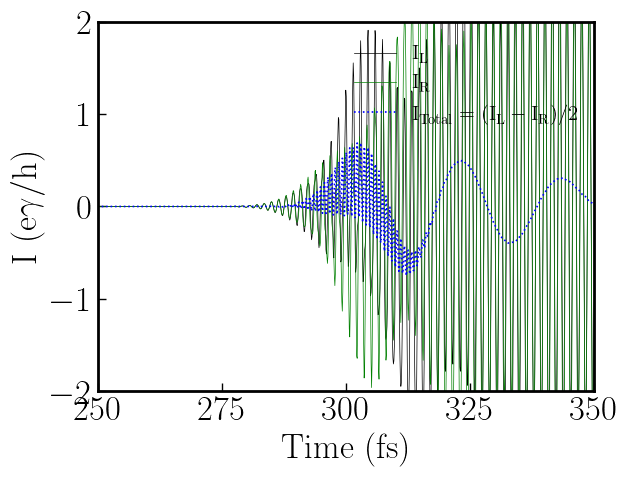

In [335]:
fig,axs = plt.subplots(1,1)
#plt.plot(data[f"cspins_f_{name1}"][:,0],data[f"cspins_f_{name1}"][:,13])
axs.plot(cc_f[:,0],cc_f[:,1],color= 'black',lw = 0.5,label =r'$\mathrm{I_L}$')
axs.plot(cc_f[:,0],cc_f[:,2],color= 'green',lw = 0.5,label = r'$\mathrm{I_R}$')
axs.plot(cc_f[:,0],(cc_f[:,1]-cc_f[:,2])/2,color= 'blue',ls = ':' ,lw = 1.2,alpha= 1.0 ,label = r'$\mathrm{I_{Total} = (I_L - I_R)/2 }$')
axs.set_ylabel(r"$\mathrm{I\ (e\gamma/h)}$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
#axs.set_ylim([-8e-6,8e-6])
axs.set_ylim([-20e-1,20e-1])
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)
#axs.set_xlim([5000,5300])
#axs.set_xlim([7000,8000])
plt.legend(frameon = False, fontsize = fs-10, loc= (0.5,  0.7))
axs.set_xlim([250,350])

## Bond currents and local densities

### Local bond charge current

(0.0, 200.0)

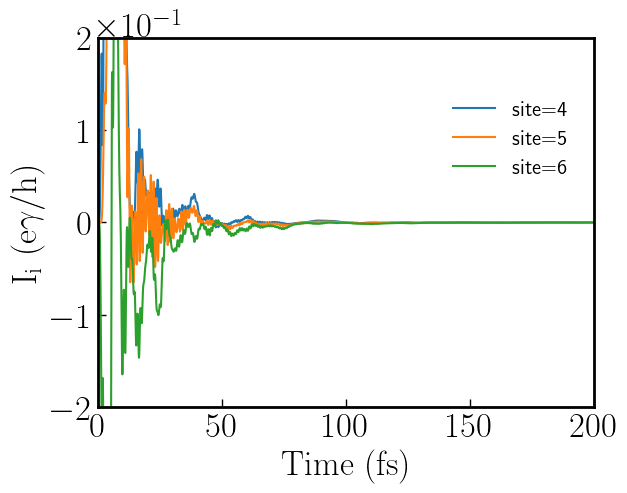

In [304]:
fig,axs =  plt.subplots(1,1)


for i in range(4,7,1):#range(4,7,1): ## Maximum is 9
    #axs.plot(cden_f[:,0], cden_f[:,i:i+1],label=f'site={i}') ### Charge bound current
    axs.plot(bcurr_f[:,0], bcurr_f[:,i:i +1],label=f'site={i}') ### Charge bound current


axs.set_ylabel(r"$\mathrm{I_i\ (e\gamma/h)}$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)

plt.legend(frameon = False, fontsize = fs-10, loc= (0.7,  0.6))

#axs.set_ylim([-0.05,0.05])
plt.ylim([-20e-2,20e-2])
#plt.xlim([5000,5300])
plt.xlim([0,200])

In [111]:
bcurr_f[:,10:11]

array([[-1.52017012e-10],
       [-1.82548881e-08],
       [-2.93231522e-07],
       ...,
       [ 1.21966252e-04],
       [ 1.21905896e-04],
       [ 1.21844727e-04]])

(0.0, 200.0)

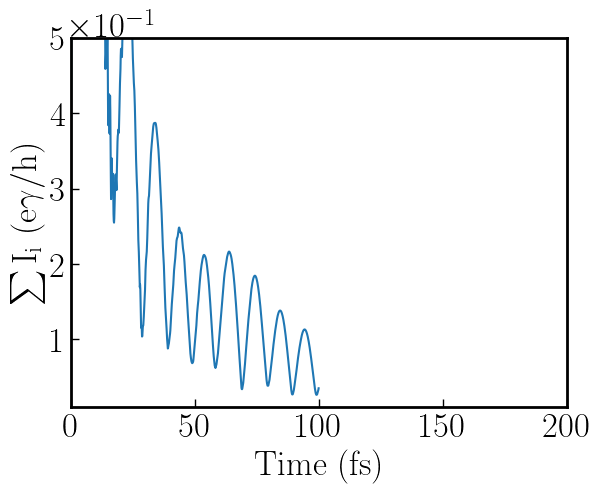

In [96]:
fig,axs =  plt.subplots(1,1)


# for i in range(4,7,1): ## Maximum is 9
#     #axs.plot(cden_f[:,0], cden_f[:,i:i+1],label=f'site={i}') ### Charge bound current
#     axs.plot(bcurr_f[:,0], bcurr_f[:,i:i +1],label=f'site={i}') ### Charge bound current
i=0
btot = 0.
for i in range(1,10):
    #print(i)
    btot += np.abs(bcurr_f[:,i:i +1])

axs.plot(bcurr_f[:,0],btot ,label=f'site={i}')

axs.set_ylabel(r"$\mathrm{\sum I_i\ (e\gamma/h)}$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)


#plt.legend(frameon = False, fontsize = fs-10, loc= (0.7,  0.6))

#axs.set_ylim([-0.05,0.05])
plt.ylim([0.1e-1,5e-1])
plt.xlim([0,200])

### Local bond spin currents

(7000.0, 7300.0)

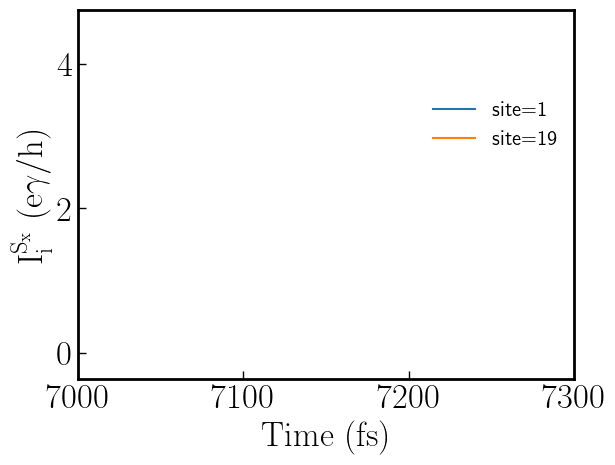

In [97]:
fig,axs =  plt.subplots(1,1)
### Charge bound current

# for i in range(4,7,1): ## Maximum is 9
#     #axs.plot(cden_f[:,0], cden_f[:,i:i+1],label=f'site={i}') ### Charge bound current
#     #axs.plot(bcurr_f[:,0], bcurr_f[:,i:i +1],label=f'site={i}') ### Charge bound current
#     axs.plot(bcurr_f[:,0], bcurr_f[:,9+i:9+i+1],label=f'site={i}',alpha =1-0.1*i) 
i=1
axs.plot(bcurr_f[:,0], bcurr_f[:,i:i+1],label=f'site={i}')

i=19
axs.plot(bcurr_f[:,0], bcurr_f[:,i:i+1],label=f'site={i}')

axs.set_ylabel(r"$\mathrm{I^{S_{x}}_i\ (e\gamma/h)}$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)

plt.legend(frameon = False, fontsize = fs-10, loc= (0.7,  0.6))

plt.xlim([7000,7300])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


(7000.0, 7400.0)

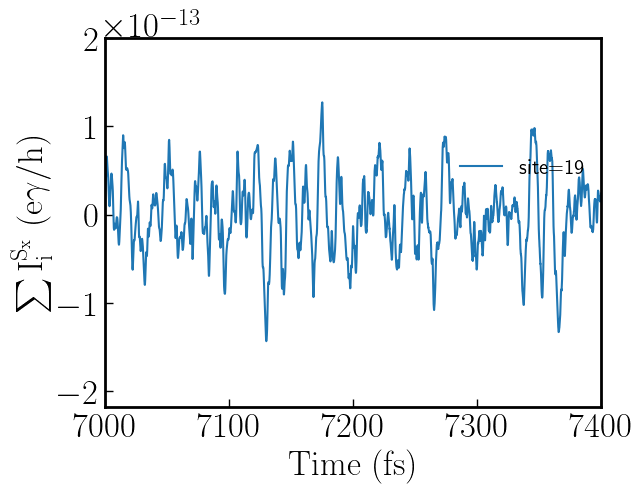

In [41]:
fig,axs =  plt.subplots(1,1)
### Charge bound current

# for i in range(4,7,1): ## Maximum is 9
#     #axs.plot(cden_f[:,0], cden_f[:,i:i+1],label=f'site={i}') ### Charge bound current
#     #axs.plot(bcurr_f[:,0], bcurr_f[:,i:i +1],label=f'site={i}') ### Charge bound current
#     axs.plot(bcurr_f[:,0], bcurr_f[:,9+i:9+i+1],label=f'site={i}',alpha =1-0.1*i) 


# For 20: 1-20:::20-39:::39-58:::58-77
# For 30: 1-30:::30-59:::59-88:::88-117
i=10
btot = 0.
for i in range(1,20):#range(10,10+9):#range(58,77):#range(10,20): 1-20:::20-39:::39-58:::58-77
    print(i)
    btot += bcurr_f[:,i:i +1]


axs.plot(bcurr_f[:,0], btot,label=f'site={i}')

axs.set_ylabel(r"$\mathrm{\sum I^{S_{x}}_i\ (e\gamma/h)}$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)

plt.legend(frameon = False, fontsize = fs-10, loc= (0.7,  0.6))

plt.xlim([7000,7400])

(0.0, 100.0)

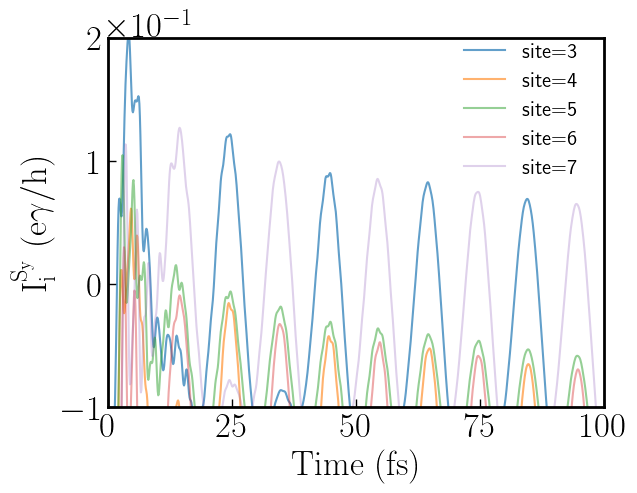

In [101]:
fig,axs =  plt.subplots(1,1)
for i in range(3,8,1): ## Maximum is 9
    #axs.plot(cden_f[:,0], cden_f[:,i:i+1],label=f'site={i}') ### Charge bound current
    #axs.plot(bcurr_f[:,0], bcurr_f[:,i:i +1],label=f'site={i}') ### Charge bound current
    axs.plot(bcurr_f[:,0], bcurr_f[:,18+i:18+i+1],label=f'site={i}',alpha =1-0.1*i) 
axs.set_ylabel(r"$\mathrm{I^{S_{y}}_i\ (e\gamma/h)}$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)
plt.legend(frameon = False, fontsize = fs-10, loc= (0.7,  0.6))
plt.xlim([5000,5300])
axs.set_ylim([-1e-1,2e-1])
plt.xlim([0,100])

(0.0, 100.0)

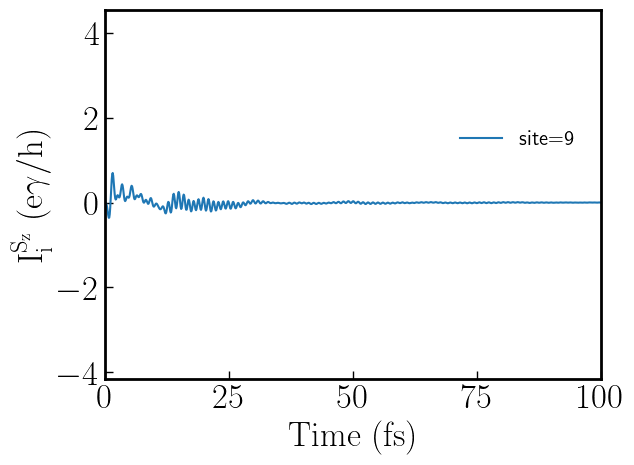

In [305]:
fig,axs =  plt.subplots(1,1)

#axs.plot(bcurr_f[:,0], bcurr_f[:,1+9*3:1+9*4]) ### Charge bound current
#axs.set_ylim([-0.05,0.05])
for i in range(9,11,1): ## Maximum is 9
    #axs.plot(cden_f[:,0], cden_f[:,i:i+1],label=f'site={i}') ### Charge bound current
    #axs.plot(bcurr_f[:,0], bcurr_f[:,i:i +1],label=f'site={i}') ### Charge bound current
    #axs.plot(bcurr_f[:,0], bcurr_f[:,18+i:18+i+1],label=f'site={i}',alpha =1-0.1*i) 
    axs.plot(bcurr_f[:,0], bcurr_f[:,i+9*3:i+1+9*3],label=f'site={i}')#,alpha =1-0.1*i) ### Charge bound current
axs.set_ylabel(r"$\mathrm{I^{S_{z}}_i\ (e\gamma/h)}$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)
plt.legend(frameon = False, fontsize = fs-10, loc= (0.7,  0.6))
#plt.xlim([5000,5300])
#axs.set_ylim([-2e-2,2e-2])
plt.xlim([0,100])

### Local density

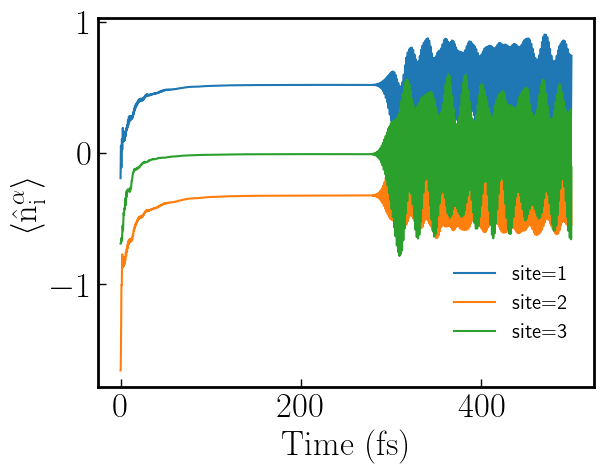

In [336]:

fig,axs =  plt.subplots(1,1)

for i in range(1,4):
    
    axs.plot(cden_f[:,0], cden_f[:,i:i+1],label=f'site={i}') ### Charge bound current

axs.set_ylabel(r"$\langle\mathrm{\hat{n}^{\alpha}_i}\rangle$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)

plt.legend(frameon = False, fontsize = fs-10, loc= (0.7,  0.1))

#axs.set_ylim([-3e-1,1e-1])
#plt.xlim([5000,5300])
#cden_f.shape

# Spin currents

## spin currents in the leads 

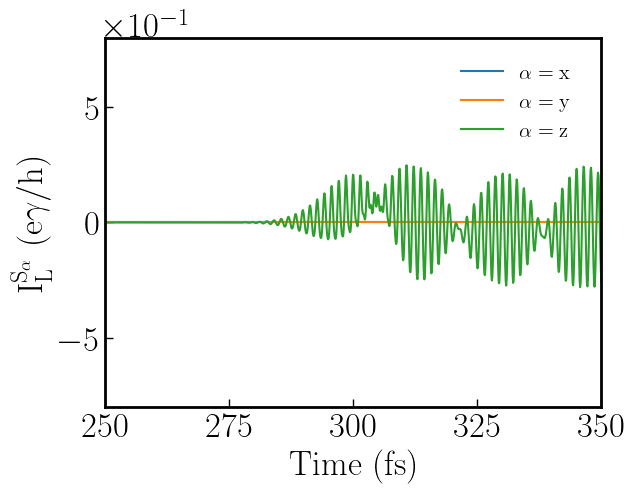

In [337]:
fig,axs = plt.subplots(1,1)
axs.plot(sc_f[:,0],sc_f[:,1], label = r'$\mathrm{\alpha = x}$')
axs.plot(sc_f[:,0],sc_f[:,2], label = r'$\mathrm{\alpha = y}$')
axs.plot(sc_f[:,0],sc_f[:,3], label = r'$\mathrm{\alpha = z}$')

axs.set_ylabel(r"$\mathrm{I^{S_{\alpha}}_L\ (e\gamma/h)}$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
plt.ylim([-8e-1,8e-1])
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)
plt.xlim([250,350])
plt.legend(frameon = False, fontsize = fs-10, loc= (0.7,  0.7))



## Total spin current  ($I^{S_{\alpha}}_{Total} =I ^{S_{\alpha}}_{L} -I ^{S_{\alpha}}_{R} )$

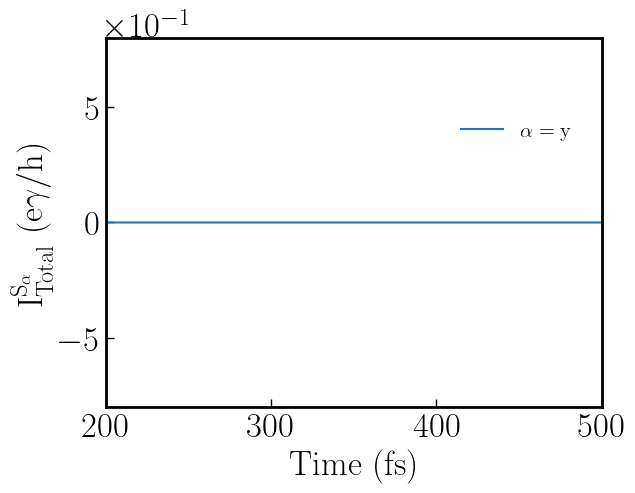

In [339]:
fig,axs = plt.subplots(1,1)
#axs.plot(sc_f[:,0],(sc_f[:,1] - sc_f[:,4])/2, label = r'$\mathrm{\alpha = x}$')
axs.plot(sc_f[:,0],(sc_f[:,2]-sc_f[:,5])/2, label = r'$\mathrm{\alpha = y}$')
#axs.plot(sc_f[:,0],(sc_f[:,3]- sc_f[:,6])/2, label = r'$\mathrm{\alpha = z}$')

axs.set_ylabel(r"$\mathrm{I^{S_{\alpha}}_{Total}\ (e\gamma/h)}$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
plt.ylim([-8e-1,8e-1])
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)
plt.xlim([200,500])
plt.legend(frameon = False, fontsize = fs-10, loc= (0.7,  0.7))

## Classical spin densities

(50.0, 500.0)

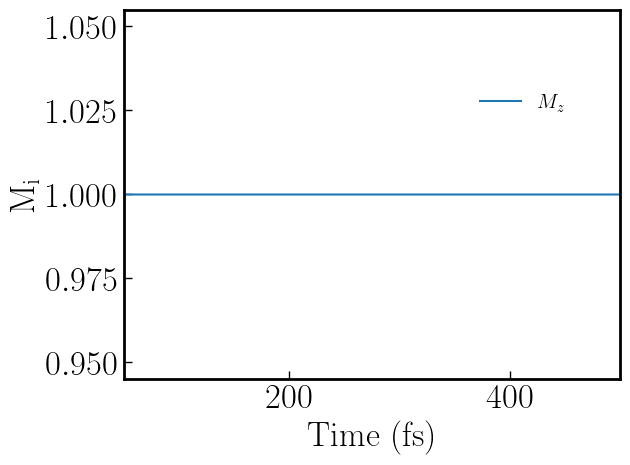

In [341]:
#N_sites = (cspins_f.shape[1]-1)//3        ### Number of sites 
fig,axs = plt.subplots(1,1)
#plt.plot(data[f"cspins_f_{name1}"][:,0],data[f"cspins_f_{name1}"][:,13])
site = 0
#axs.plot(cspins_f[:,0],cspins_f[:,site*3+1],label=r'$M_x$')
#axs.plot(cspins_f[:,0],cspins_f[:,site*3+2],label=r'$M_y$')
axs.plot(cspins_f[:,0],cspins_f[:,site*3+3],label=r'$M_z$')

# axs.plot(cspins_f[:,0],cspins_f[:,4],alpha = 0.5)
# axs.plot(cspins_f[:,0],cspins_f[:,5])
# axs.plot(cspins_f[:,0],cspins_f[:,6],alpha = 0.5)

axs.set_ylabel(r"$\mathrm{M_i}$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)
plt.legend(frameon = False, fontsize = fs-10, loc= (0.7,  0.7))

axs.set_xlim([50,500])

#plt.plot(cspins_f[:,1]**2 + cspins_f[:,2]**2 + cspins_f[:,3]**2 )

## Equilibirium spin densities

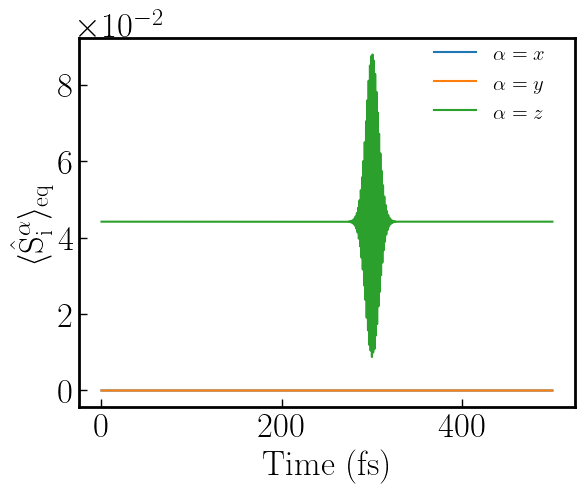

In [342]:
fig,axs = plt.subplots(1,1)
site = 8
#plt.plot(data[f"cspins_f_{name1}"][:,0],data[f"cspins_f_{name1}"][:,13])
axs.plot(seq_f[:,0],seq_f[:,site*3+1],label = r'$\alpha=x$')
axs.plot(seq_f[:,0],seq_f[:,site*3+2],label = r'$\alpha=y$')
axs.plot(seq_f[:,0],seq_f[:,site*3+3],label = r'$\alpha=z$')

axs.set_ylabel(r"$\langle\mathrm{\hat{S}^{\alpha}_i}\rangle_{\mathrm{eq}}$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)
plt.legend(frameon = False, fontsize = fs-10, loc= (0.7,  0.75))

#axs.set_xlim([5000,5100])


## Nonequilibrium spin densities

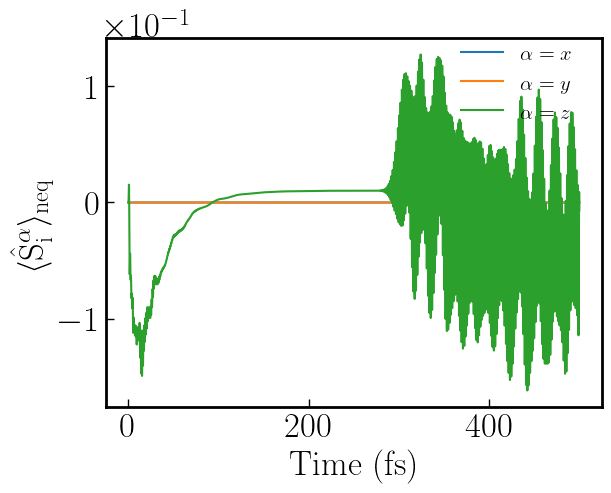

In [343]:
fig,axs = plt.subplots(1,1)
#plt.plot(data[f"cspins_f_{name1}"][:,0],data[f"cspins_f_{name1}"][:,13])
site = 0

axs.plot(sneq_f[:,0],sneq_f[:,site*3+1],label = r'$\alpha=x$')
axs.plot(sneq_f[:,0],sneq_f[:,site*3+2],label = r'$\alpha=y$')
axs.plot(sneq_f[:,0],sneq_f[:,site*3+3],label = r'$\alpha=z$')

axs.set_ylabel(r"$\langle\mathrm{\hat{S}^{\alpha}_i}\rangle_{\mathrm{neq}}$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)
plt.legend(frameon = False, fontsize = fs-10, loc= (0.7,  0.75))

#axs.set_xlim([5000,5100])


## Non equilibirium spin densities per site 

(0.0, 100.0)

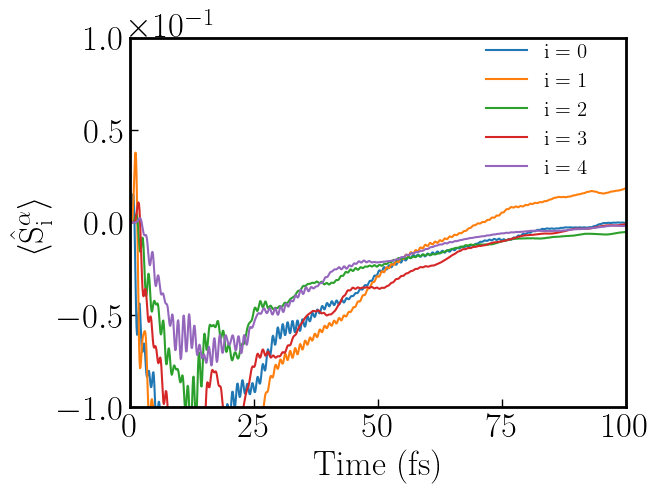

In [314]:
fig,axs = plt.subplots(1,1)
al = 3 
axs.plot(sneq_f[:,0],sneq_f[:,0*3+al],label = r'$\mathrm{i=0}$')
axs.plot(sneq_f[:,0],sneq_f[:,1*3+al],label = r'$\mathrm{i=1}$')
axs.plot(sneq_f[:,0],sneq_f[:,2*3+al],label = r'$\mathrm{i=2}$')
axs.plot(sneq_f[:,0],sneq_f[:,3*3+al],label = r'$\mathrm{i=3}$')
axs.plot(sneq_f[:,0],sneq_f[:,4*3+al],label = r'$\mathrm{i=4}$')

axs.set_ylabel(r"$\langle\mathrm{\hat{S}^{\alpha}_i}\rangle$", fontsize = fs)
axs.set_xlabel(r"$\mathrm{Time\ (fs)}$",fontsize = fs)
axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axs.yaxis.offsetText.set_fontsize(fs)
plt.legend(frameon = False, fontsize = fs-10, loc= (0.7,  0.6))
axs.set_ylim([-1e-1,1e-1])
axs.set_xlim([0,100])

# Spin liquid data

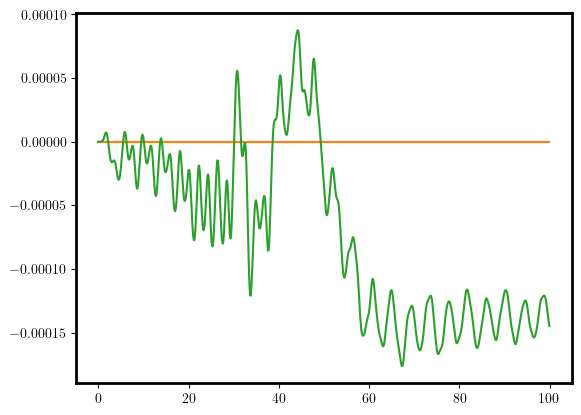

In [340]:
plt.plot(sden_sl_f[:,0], sden_sl_f[:,19])
plt.plot(sden_sl_f[:,0], sden_sl_f[:,20])
plt.plot(sden_sl_f[:,0], sden_sl_f[:,21])
#plt.plot(sden_sl_f[:,0], sden_sl_f[:,24])

In [227]:
#sden_sl_f[:,6]

3
6
9
12
15
18
21
24
27
30


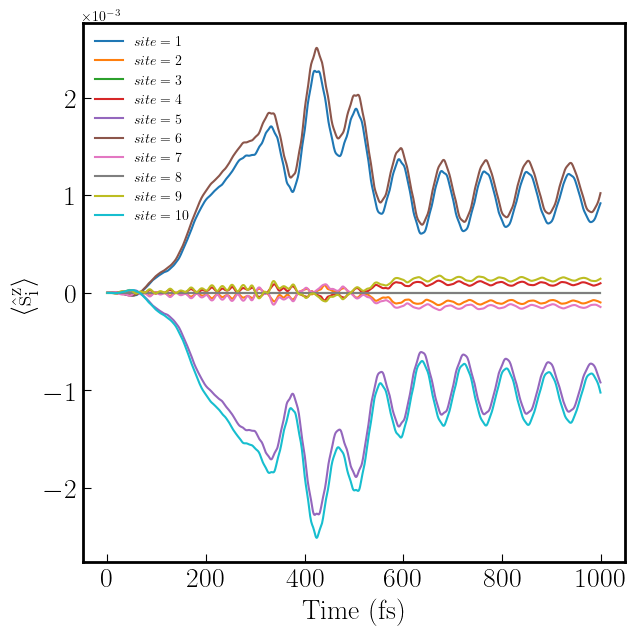

In [341]:
#sz_sden_pos = [sden_sl_f[:,i] for i in range(3,6,3) ]
#plt.plot(sden_sl_f[:,1],sz_sden_pos )
fig,axes=plt.subplots(1,1,figsize=(7,7))
fs =20
for i in range(3,31,3):
    print(i)
    plt.plot(sden_sl_f[:,i],label=f"$site={i//3}$")
plt.legend()  
axes.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axes.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axes.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6)
axes.set_ylabel(r'$\mathrm{\langle \hat s^z_i \rangle}$',fontsize=fs)
axes.set_xlabel(r'$\mathrm{Time\ (fs)}$',fontsize=fs)
#axes.set_ylim([-0.1,1.2])
axes.legend(frameon=False)

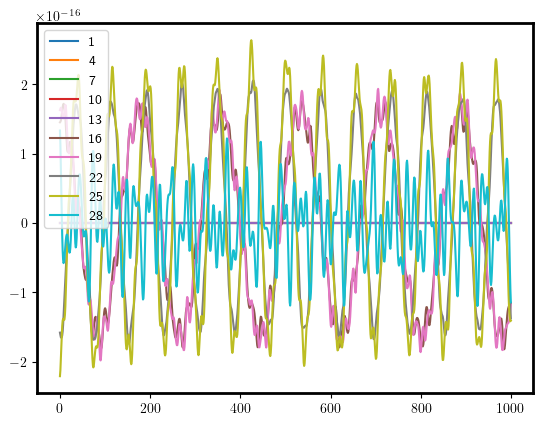

In [342]:
for i in range(1,31,3):
    plt.plot(sden_sl_f[:,i],label=f"{i}")
plt.legend()  

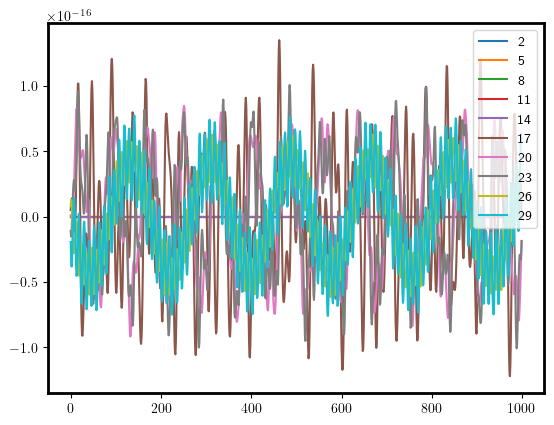

In [343]:
for i in range(2,31,3):
    plt.plot(sden_sl_f[:,i],label=f"{i}")
plt.legend()  

In [185]:
for i in range(3,31,3):
    print(i)

3
6
9
12
15
18
21
24
27
30


In [161]:
sden_sl_f.shape

(1000, 31)

In [162]:
ent_f

array([[ 0.        ,  0.33789455],
       [ 0.1       ,  0.33789455],
       [ 0.2       ,  0.33789455],
       ...,
       [99.7       ,  0.33789442],
       [99.8       ,  0.33789436],
       [99.9       ,  0.33789429]])

Text(0.5, 0, 'time')

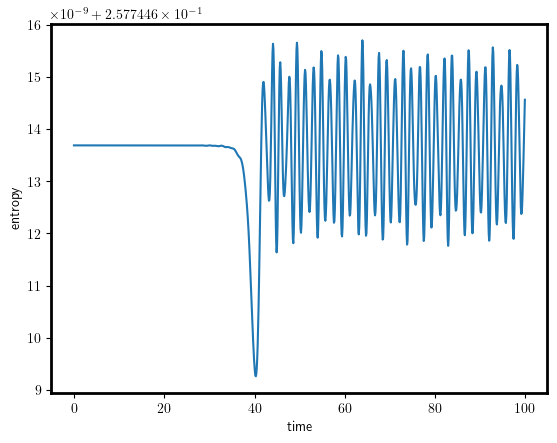

In [284]:
fig,ax = plt.subplots(1,1)
ax.plot(ent_f[:,0],ent_f[:,1])
ax.set_ylabel("entropy")
ax.set_xlabel("time")


In [704]:
range(4,3,31)

range(4, 3, 31)

In [387]:
3*np.pi/2

4.71238898038469